### IMPORTS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
from sklearn.metrics import mean_squared_error

### Given function to plot color space

In [2]:
def plot_colour_space(RGB, title=None, hold=False, **kwargs):
    if hold:
        ax = plt.gca()
    else:
        fig = plt.figure(figsize=(6, 8))
        ax = fig.add_subplot(111, projection='3d')
    kwargs.setdefault('alpha', 1.0)
    ax.scatter(RGB[:, 0], RGB[:, 1], RGB[:, 2], **kwargs)
    ax.set_xlabel('R', color='r', fontweight='bold', fontsize=15)
    ax.set_ylabel('G', color='g', fontweight='bold', fontsize=15)
    ax.set_zlabel('B', color='b', fontweight='bold', fontsize=15)
    if title is not None:
        ax.set_title(title)
    plt.show()

### Loading Image 

In [10]:
path = 'bird.png'
image = Image.open(path)
image = np.array(image) / 255.0

### Plotting Original Image

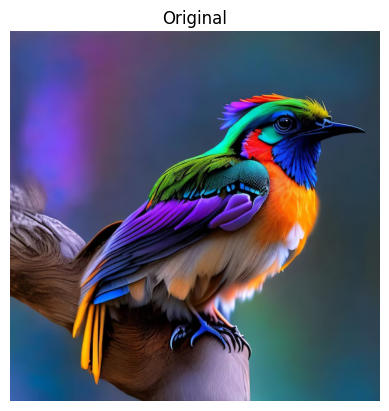

In [11]:
plt.imshow(image)
plt.title("Original")
plt.axis('off')
plt.show()

### Plotting original color space

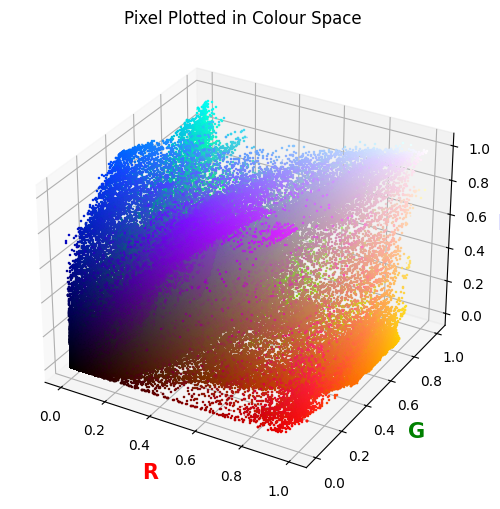

In [14]:
pixels = image.reshape(-1, 3)
plot_colour_space(pixels, c=pixels,s=0.5, marker='s', title='Pixel Plotted in Colour Space')

## Kmean 

In [17]:
def apply_kmeans(image, K):
    pixels = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=K, random_state=42).fit(pixels)
    return kmeans

In [18]:
def plot_centroids(kmeans, K):
    centroids = kmeans.cluster_centers_
    plot_colour_space(centroids, c=centroids, marker='o', title=f"Centroids of K={K}")

In [19]:
def recolor_image(image, kmeans):
    pixels = image.reshape(-1, 3)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    recolored_pixels = centroids[labels].reshape(image.shape)
    return recolored_pixels

### K = 5

In [20]:
kmeans_5 = apply_kmeans(image, 5)
recolored_image_5 = recolor_image(image, kmeans_5)

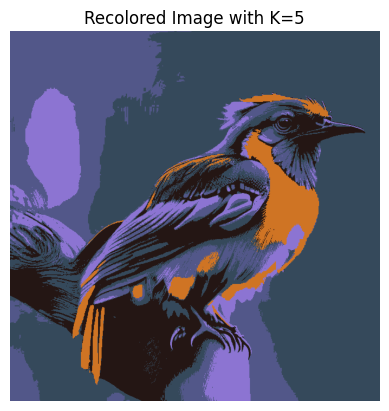

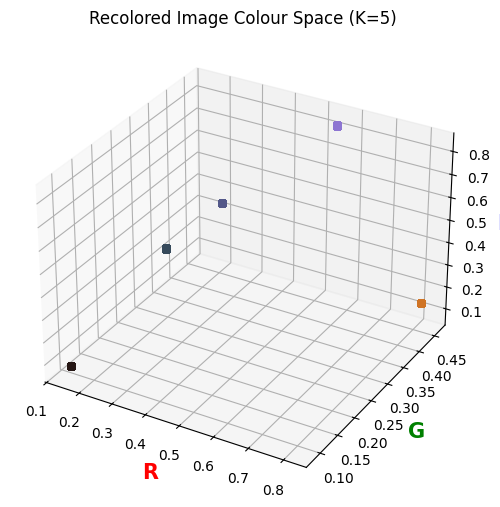

In [21]:
plt.imshow(recolored_image_5)
plt.title("Recolored Image with K=5")
plt.axis('off')
plt.show()

plot_colour_space(recolored_image_5.reshape(-1, 3), c=recolored_image_5.reshape(-1, 3), marker='s', title='Recolored Image Colour Space (K=5)')

### K = 10

In [22]:
kmeans_10 = apply_kmeans(image, 10)
recolored_image_10 = recolor_image(image, kmeans_10)

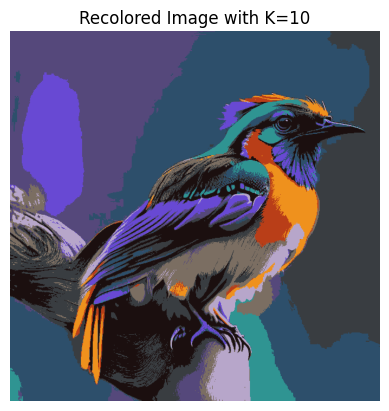

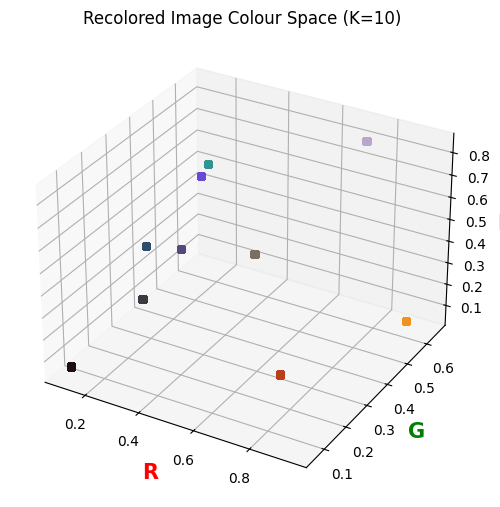

In [26]:
plt.imshow(recolored_image_10)
plt.title("Recolored Image with K=10")
plt.axis('off')
plt.show()

plot_colour_space(recolored_image_10.reshape(-1, 3), c=recolored_image_10.reshape(-1, 3), marker='s', title='Recolored Image Colour Space (K=10)') 

In [27]:
def compute_mse(original_image, recolored_image):
    return mean_squared_error(original_image.flatten(), recolored_image.flatten())

In [28]:
mse_5 = compute_mse(image, recolored_image_5)
mse_10 = compute_mse(image, recolored_image_10)

print(f"MSE for K=5: {mse_5}")
print(f"MSE for K=10: {mse_10}")

MSE for K=5: 0.01102681475410558
MSE for K=10: 0.006116760051369018
